In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
1574,28089,city_28,0.939,Female,No relevent experience,Part time course,Graduate,STEM,4.0,50-99,Pvt Ltd,24.0,0.0
2991,18732,city_50,0.896,Male,No relevent experience,Full time course,Masters,STEM,7.0,50-99,Public Sector,54.0,0.0
13300,31161,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,1.0,100-500,Pvt Ltd,27.0,1.0
9646,19484,city_136,0.897,Male,Has relevent experience,no_enrollment,High School,NaN,2.0,10/49,Pvt Ltd,30.0,0.0
15648,10614,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,50-99,Pvt Ltd,35.0,0.0


## Complete Case Analysis And Removing Method

In [4]:
#df.to_csv("Dataset/data_science_job.csv")

In [8]:
import missingno as mis

<AxesSubplot:>

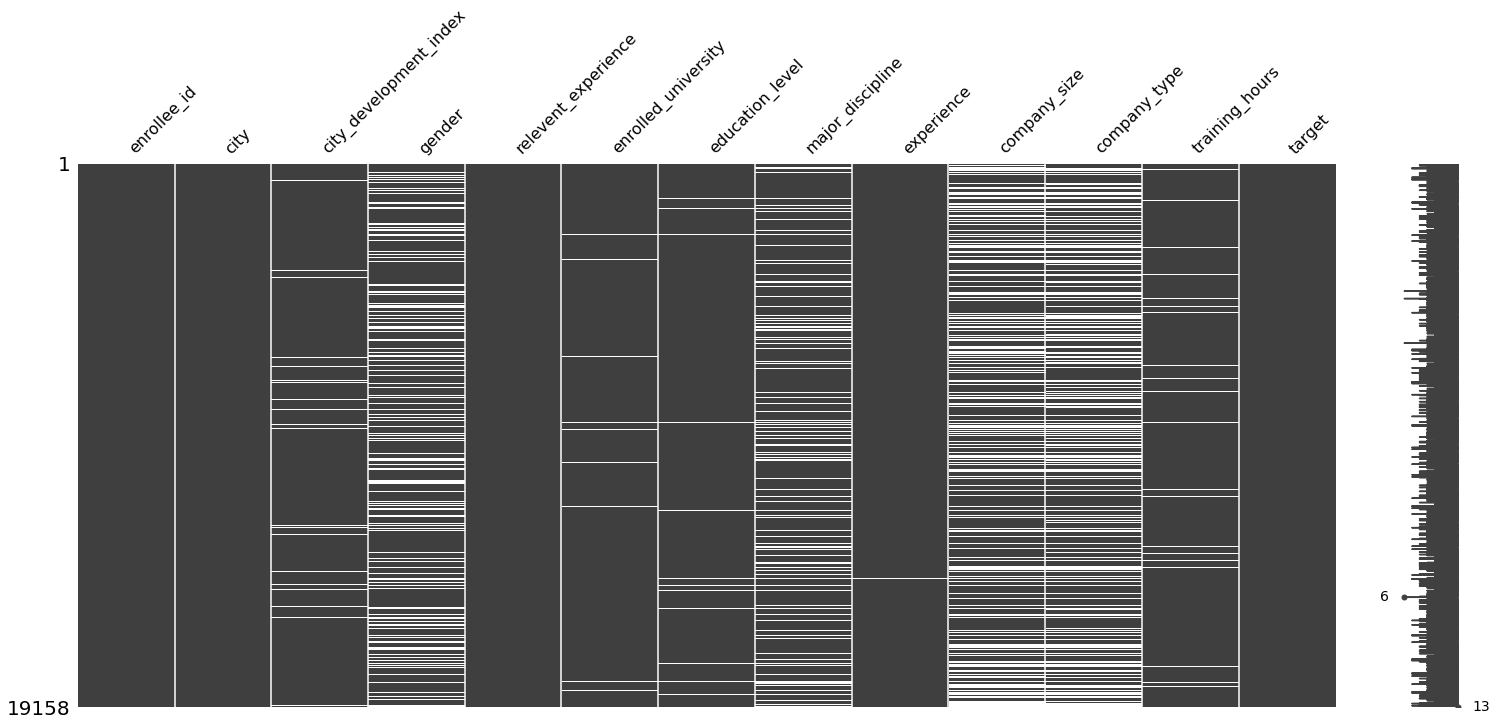

In [9]:
mis.matrix(df)

In [14]:
df.shape

(19158, 13)

In [15]:
df.isnull().sum()/df.shape[0]*100
#df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [20]:
# Taking all feature name which has missing values less then 5% data
col = [val for val in df.columns if df[val].isnull().mean() <= 0.05 and df[val].isnull().mean()>0 ]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [22]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14384,0.920,Part time course,Masters,12.0,13.0
7197,0.920,no_enrollment,Graduate,15.0,88.0
12555,0.920,no_enrollment,Graduate,20.0,30.0
10071,0.624,no_enrollment,Graduate,2.0,59.0
895,0.910,no_enrollment,NaN,4.0,48.0


In [23]:
df["education_level"].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [25]:
# Calculating total row of deletion data in Percentage
len(df[col].dropna())/len(df)

0.8968577095730244

In [26]:
new_df = df[col].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

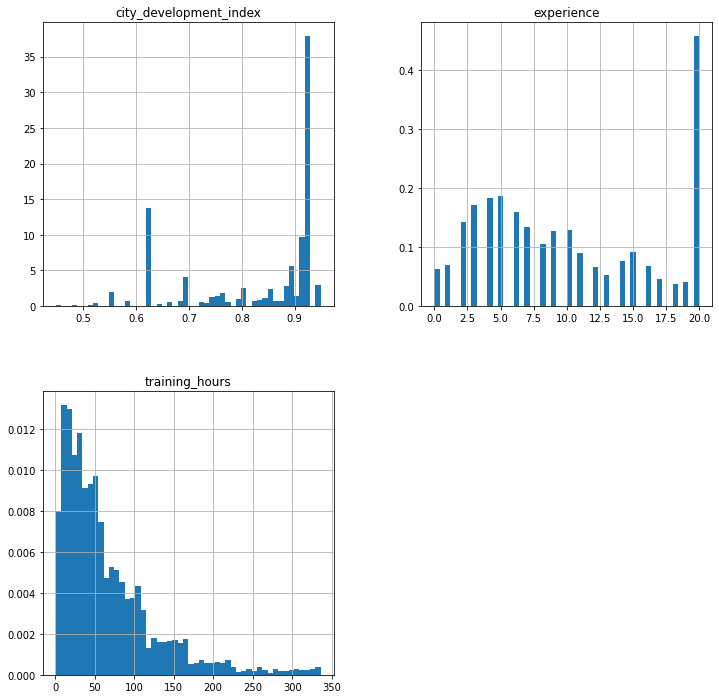

In [29]:
new_df.hist(bins = 50, density=True, figsize = (12,12))
plt.show()

<AxesSubplot:>

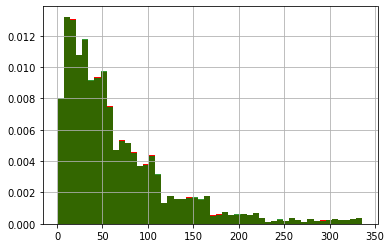

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

- Observation :
    1. Data Density did not change much.
    2. Null values is Random and removing them will not Affect our models

<AxesSubplot:>

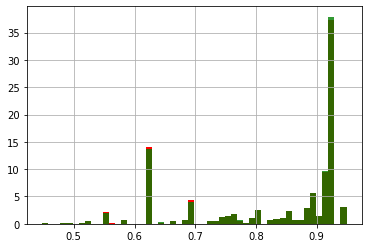

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

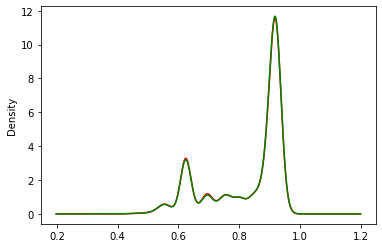

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

In [33]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [34]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [ ]:
['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [36]:
# Change variance test:
print("Variance of Trainnig Hours Orignal : ",df['training_hours'].var())
print("Variance of Trainning Hours After : ",new_df['training_hours'].var())

Variance of Trainnig Hours Orignal :  3586.2881933989406
Variance of Trainning Hours After :  3576.134239128826
